# Assignment 2: Scale-Space Blob Detection

### The goal of this assignment is to implement a Laplacian blob detector

Noel Mrowiec
10/1/2024
mrowiec3

In [275]:
# Libraries you will find useful
import numpy as np
import scipy 
import skimage
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps 
# for applying the Laplacian filter
from scipy.ndimage.filters import gaussian_laplace, maximum_filter

/tmp/ipykernel_964/681115042.py:9: DeprecationWarning: Please import `gaussian_laplace` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_laplace, maximum_filter
/tmp/ipykernel_964/681115042.py:9: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_laplace, maximum_filter


In [276]:
# Function to globally normalize a 2D array to the range [0, 1] 
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

In [277]:

# load each image 
dir_path = "images/"
images = []     #color images
filenames = []
for filename in os.listdir(dir_path):
    if filename.endswith('.jpg'):
        filenames.append(filename)
        img_path = os.path.join(dir_path, filename)
        img = Image.open(img_path)
        #img.show()  # This will display the image
        
        # convert images to grayscale
        img_gs = ImageOps.grayscale(img) 
        #img_gs.show()
        img_gs = np.array(img_gs).astype(float)
        img_gs = normalize(img_gs)
        images.append(img_gs)
        

print(f"Loaded {len(images)} images")

Loaded 4 images


In [278]:
def get_sigma(k):
    return (2 ** k)

In [279]:

def laplacian_gaussian(image, sigmas):
    scale_space = np.empty((image.shape[0],image.shape[1], len(sigmas)))

    for k, sigma in enumerate(sigmas):
        #sigma = get_sigma(k)
        lap_gaus = gaussian_laplace(image, sigma, mode='nearest') 
        scale_norm_LoG = (sigma ** 2) * lap_gaus                                                      #scale normalized
        scale_space[:,:,k] = scale_norm_LoG

    return scale_space

In [280]:
import numpy as np
from scipy.ndimage import gaussian_laplace, maximum_filter

# Example image
image = np.random.rand(10, 10)
sigmas = range(1, 5)  # Sigma values from 1 to 11

print(image)

# Create a 3D scale space
scale_space = np.stack([gaussian_laplace(image, sigma=sigma) for sigma in sigmas], axis=-1)

# Non-maximum suppression in 3D
footprint = np.ones((3, 3, 3))
local_maxima = (scale_space == maximum_filter(scale_space, footprint=footprint))

# Get coordinates of the local maxima
coordinates = np.argwhere(local_maxima)

# Print the coordinates and corresponding sigma
for coord in coordinates:
    x, y, z = coord
    sigma = sigmas[z]
    print(f"Local maxima at (x={x}, y={y}) with sigma={sigma}")



[[0.80385357 0.71444491 0.76234116 0.25019405 0.89626119 0.86341213
  0.19711472 0.68688582 0.0837699  0.30867978]
 [0.78288099 0.87854821 0.9269232  0.7862122  0.95538786 0.21789825
  0.489403   0.57389942 0.23792182 0.6242298 ]
 [0.67237962 0.34228304 0.36564008 0.19508275 0.15146337 0.565153
  0.32611664 0.47552165 0.93645139 0.24087756]
 [0.75263329 0.16030018 0.22621471 0.49280951 0.97854908 0.43626802
  0.58823622 0.69221159 0.22855413 0.59856972]
 [0.7568415  0.72479681 0.9681859  0.49171454 0.08941061 0.4166617
  0.94054506 0.61471086 0.67657081 0.32542847]
 [0.83168375 0.16397708 0.36485287 0.2653039  0.59127521 0.25176571
  0.10201738 0.45672315 0.73604137 0.92100195]
 [0.72643316 0.56263842 0.19668287 0.81052687 0.73950737 0.71427102
  0.90065133 0.15265773 0.22825689 0.7168539 ]
 [0.96668516 0.04650303 0.18864426 0.59993095 0.63387769 0.85158529
  0.48531833 0.40699541 0.79710673 0.53148478]
 [0.11206096 0.56629866 0.44118906 0.8529459  0.55373971 0.06171947
  0.51353998 0.

In [281]:
from scipy.ndimage.filters import rank_filter

def non_max_suppression(array, threshold):
    local_max = rank_filter(array, rank=-1, size=13)

    # Only keep the pixels that are local maxima
    result = np.where(array == local_max, array, 0)

    #suppress any result less than threshold
    result = np.where(result < threshold, 0, array)
    return result

/tmp/ipykernel_964/1999998974.py:1: DeprecationWarning: Please import `rank_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import rank_filter


In [282]:
def threshold_scale_space(lap_of_gauss, threshold):
    #suppress any result less than threshold
    result = np.where(lap_of_gauss < threshold, 0, lap_of_gauss)
    return result

In [283]:
# #TODO remove
# from skimage import feature
# def get_local_peak_coord(stacked_images):

#     lm = feature.peak_local_max(stacked_images, threshold_abs=10, footprint=np.ones((3, 3, 3)), threshold_rel=10, exclude_border=True)
#     return lm[0], lm[1]

In [284]:
# def get_xy_coordinates(image):
#     # Non-maximum suppression in 3D
#     footprint = np.ones((3, 3, 3))
#     local_maxima = (scale_space == maximum_filter(scale_space, footprint=footprint))

#     # Get coordinates of the local maxima
#     coordinates = np.argwhere(local_maxima)

#     # Print the coordinates and corresponding sigma
#     for coord in coordinates:
#         x, y, z = coord
#         sigma = sigmas[z]
#         print(f"Local maxima at (x={x}, y={y}) with sigma={sigma}"


In [285]:
def non_max_suppression_3d(scale_space, sigmas):

    # Non-maximum suppression in 3D
    footprint = np.ones((3, 3, len(sigmas)))
    local_maxima = (scale_space == maximum_filter(scale_space, footprint=footprint))

    return local_maxima

In [286]:
def get_maxima_coords(local_maxima, threshold):
    """
    returns: a list of coordinates of local maxima (x,y,sigma)
    """
    # Get coordinates of the local maxima
    coordinates = np.argwhere(local_maxima)
    
    x_coords, y_coords, z_coords = [], [], []
    # Filter coordinates by the threshold

    #source: Copilot
    for coord in coordinates:
        if local_maxima[tuple(coord)] > threshold:
            x, y, z = coord
            x_coords.append(x)
            y_coords.append(y)
            z_coords.append(z)


    return [x_coords, y_coords, z_coords]

In [287]:
# constant
sqt_2 = 2**(1/2)
type(sqt_2)

float

In [288]:
#N = 10
SIGMAS = [1,2,4,8,16,32]
coordinates_per_image = []

mean_percent = 1

for image in images:
    lap_of_gauss = laplacian_gaussian(image, SIGMAS)
    #take absolute value
    lap_of_gauss = np.abs(lap_of_gauss)

    #threshold scale space
    threshold = np.percentile(lap_of_gauss, 90)
    # lap_of_gauss = threshold_scale_space(lap_of_gauss, threshold)

    #3D non-maximum suppression
    local_maxima = non_max_suppression_3d(lap_of_gauss, SIGMAS)
    coordinates = get_maxima_coords(local_maxima, threshold)
    coordinates_per_image.append(coordinates)

    # for k, sigma in enumerate(SIGMAS):
       
    #     #non_max_suppressed = non_max_suppression(lap_of_gauss[:,:, k], threshold)

    #     # Convert to Pandas DataFrame
    #     # df = pd.DataFrame(non_max_suppressed)

    #     # print(df.describe())


    #     #h_pos, w_pos = get_xy_coordinates(non_max_suppressed)
    #     h_pos, w_pos = get_local_peak_coord()

    #     x_coordinates = np.append(x_coordinates, w_pos)
    #     y_coordinates = np.append(y_coordinates, h_pos)

    #     radii = np.append(radii, np.full(h_pos.shape[0], sigma * sqt_2))       # TODO divide by sigma squared?




In [289]:





# filtering the image (two implementations)
# one that increases filter size, and one that downsamples the image
# For timing, use time.time()



# nonmaximum suppression in scale space
# you may find functions scipy.ndimage.filters.rank_filter or scipy.ndimage.filters.generic_filter useful



# To display the detected regions as circle
from matplotlib.patches import Circle
def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cy))

    plt.show()

image size (356, 493)
num of images 4
[ 2  4 32 ...  2  2  2]


TypeError: 'numpy.int64' object is not iterable

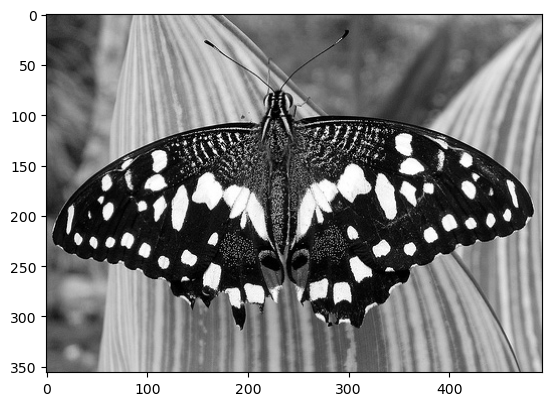

In [291]:
#np.set_printoptions(threshold=np.inf)

print(f"image size {images[0].shape}")
print(f"num of images {len(coordinates_per_image)}")

for i, coords in enumerate(coordinates_per_image):
   
    cx, cy, cz = coords
    sigmas = np.array([SIGMAS[z] for z in cz])
    print(sigmas)
    radii = sigmas * sqt_2
    show_all_circles(images[i], x, y, radii)
#show_all_circles(images[0], [55,33,88,10], [76,350,12,100], [5,7,1,2])

In [158]:
import numpy as np
from scipy.ndimage import gaussian_laplace, maximum_filter

# Example image and sigma values
image = np.random.rand(100, 100)
sigmas = range(1, 12)  # Sigma values from 1 to 11

# Create a 3D scale space
scale_space = np.stack([gaussian_laplace(image, sigma=sigma) for sigma in sigmas], axis=-1)

# Calculate the 80th percentile value
threshold = np.percentile(scale_space, 80)

# Non-maximum suppression in 3D
footprint = np.ones((3, 3, 3))
local_maxima = (scale_space == maximum_filter(scale_space, footprint=footprint))

# Get coordinates of the local maxima
coordinates = np.argwhere(local_maxima)

# Filter coordinates by the threshold
filtered_coords = [coord for coord in coordinates if scale_space[tuple(coord)] > threshold]

# Print the filtered coordinates and corresponding sigma
for coord in filtered_coords:
    print(coord)
    x, y, z = coord
    sigma = sigmas[z]
    print(f"Local maxima at (x={x}, y={y}) with sigma={sigma} and value={scale_space[tuple(coord)]}")



[0 2 0]
Local maxima at (x=0, y=2) with sigma=1 and value=0.3170147115137198
[ 0 11  0]
Local maxima at (x=0, y=11) with sigma=1 and value=0.13656090101370383
[ 0 15  0]
Local maxima at (x=0, y=15) with sigma=1 and value=0.07079034963849126
[ 0 19  0]
Local maxima at (x=0, y=19) with sigma=1 and value=0.14297114246963258
[ 0 23  0]
Local maxima at (x=0, y=23) with sigma=1 and value=0.13180387227858187
[ 0 25  0]
Local maxima at (x=0, y=25) with sigma=1 and value=0.1393506832717463
[ 0 30  0]
Local maxima at (x=0, y=30) with sigma=1 and value=0.19191670454852855
[ 0 37  0]
Local maxima at (x=0, y=37) with sigma=1 and value=0.2589948052247585
[ 0 42  0]
Local maxima at (x=0, y=42) with sigma=1 and value=0.24334272905734666
[ 0 49  0]
Local maxima at (x=0, y=49) with sigma=1 and value=0.1355020652781881
[ 0 52  0]
Local maxima at (x=0, y=52) with sigma=1 and value=0.24213732999403245
[ 0 56  0]
Local maxima at (x=0, y=56) with sigma=1 and value=0.012556133674663857
[ 0 76  0]
Local maxima

In [140]:
import cv2
import numpy as np

# Load your image
image = cv2.imread('images/butterfly.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Print the radius (scale) of each keypoint
for kp in keypoints:
    print(f"Keypoint radius: {kp.size}")

print(f"number of keypoints {len(keypoints)}")


Keypoint radius: 7.039892673492432
Keypoint radius: 7.039892673492432
Keypoint radius: 9.89643383026123
Keypoint radius: 9.89643383026123
Keypoint radius: 9.936521530151367
Keypoint radius: 8.38396167755127
Keypoint radius: 11.6674165725708
Keypoint radius: 11.6674165725708
Keypoint radius: 10.20260238647461
Keypoint radius: 10.20260238647461
Keypoint radius: 5.025646686553955
Keypoint radius: 5.977290153503418
Keypoint radius: 8.488493919372559
Keypoint radius: 5.123463153839111
Keypoint radius: 5.123463153839111
Keypoint radius: 8.046290397644043
Keypoint radius: 9.387319564819336
Keypoint radius: 9.387319564819336
Keypoint radius: 7.613601207733154
Keypoint radius: 17.341140747070312
Keypoint radius: 14.746243476867676
Keypoint radius: 9.3104887008667
Keypoint radius: 14.199297904968262
Keypoint radius: 6.085587024688721
Keypoint radius: 6.085587024688721
Keypoint radius: 7.732848644256592
Keypoint radius: 9.687704086303711
Keypoint radius: 5.872124195098877
Keypoint radius: 9.58001